In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
import uproot

#### 1. Get 2018 Fit-diagonistic

In [2]:
myfile = "fitDiagnosticsTest.root"
bh_hist = uproot.open(myfile)['covariance_fit_s'].to_boost()

#### 2. Indices for WZG theoretical uncs

In [3]:
for idx,i in enumerate(bh_hist.axes[0]):
    if "WZG_" not in i:
        continue
    print(idx,i)

27 WZG_PSWeight_Fsr
28 WZG_PSWeight_Isr
29 WZG_pdf
30 WZG_scale


####  3. Check Correlation
 - Low correlation between WZG theory uncs and others

In [4]:
target_list = [27,28,29,30]
for idx_theo in target_list:
    for idx,i in enumerate(reversed(bh_hist.axes[0])):
        if abs(bh_hist[idx_theo,idx].value) > .005:
            if  i=='r': # this is signal strength
                continue
            print(f"{bh_hist.axes[0][idx_theo]} {i} corr: {bh_hist[idx_theo,idx].value}")


WZG_PSWeight_Fsr prop_binSR_bin3_FakePho corr: -0.007023911284964288
WZG_PSWeight_Fsr prop_binSR_bin3_FakeLep corr: -0.006981426956275516
WZG_PSWeight_Fsr prop_binSR_bin1_FakeLep corr: 0.005691938226457639
WZG_PSWeight_Fsr prop_binSR_bin0_FakePho corr: 0.006022882873415927
WZG_PSWeight_Fsr prop_binSR_bin0_FakeLep corr: 0.005605118452285474
WZG_PSWeight_Fsr WZG_PSWeight_Fsr corr: 1.0
WZG_PSWeight_Isr WZG_PSWeight_Isr corr: 1.0
WZG_pdf WZG_pdf corr: 1.0
WZG_scale WZG_scale corr: 1.0


In [5]:
bh_hist[27:31,0:]

Histogram(
  StrCategory(['WZG_PSWeight_Fsr', 'WZG_PSWeight_Isr', 'WZG_pdf', 'WZG_scale']),
  StrCategory(['Electron_ID_Weight', 'Electron_RECO_Weight', 'FakePho_closure', 'FakePho_iso', 'FakePho_mc', 'FakePho_stat_18', 'HLT_method_sys', 'HLT_stat_18', 'Muon_ID_Weight', 'Photon_ID_Weight', 'Top_PSWeight_Fsr', 'Top_PSWeight_Isr', 'Top_pdf', 'Top_scale', 'VG_PSWeight_Fsr', 'VG_PSWeight_Isr', 'VG_pdf', 'VG_scale', 'VVV_PSWeight_Fsr', 'VVV_PSWeight_Isr', 'VVV_pdf', 'VVV_scale', 'VV_Norm', 'VV_PSWeight_Fsr', 'VV_PSWeight_Isr', 'VV_pdf', 'VV_scale', 'WZG_PSWeight_Fsr', 'WZG_PSWeight_Isr', 'WZG_pdf', 'WZG_scale', 'btagWeight_bc_corr', 'btagWeight_bc_uncorr_18', 'btagWeight_l_corr', 'btagWeight_l_uncorr_18', 'fakerate_18Ele', 'fakerate_18Mu', 'fakerate_18Stat', 'jer_18', 'jesTotal_18', 'lumi_1718', 'lumi_18', 'lumi_fullrun2', 'prop_binCR1_bin0_FakeLep', 'prop_binCR1_bin0_Top', 'prop_binCR1_bin0_VG', 'prop_binCR1_bin0_VV', 'prop_binCR1_bin0_VVV', 'prop_binCR1_bin0_WZG', 'prop_binCR1_bin1_FakeLe

#### 4. Visualize correaltion between theory unc (x-axis) vs others (y-axis)  
- Yellow line : self-correlation

C:\Users\USER\AppData\Local\Temp\ipykernel_35044\2782661737.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['WZG_PSWeight_Fsr', 'WZG_PSWeight_Isr', 'WZG_pdf', 'WZG_scale'])


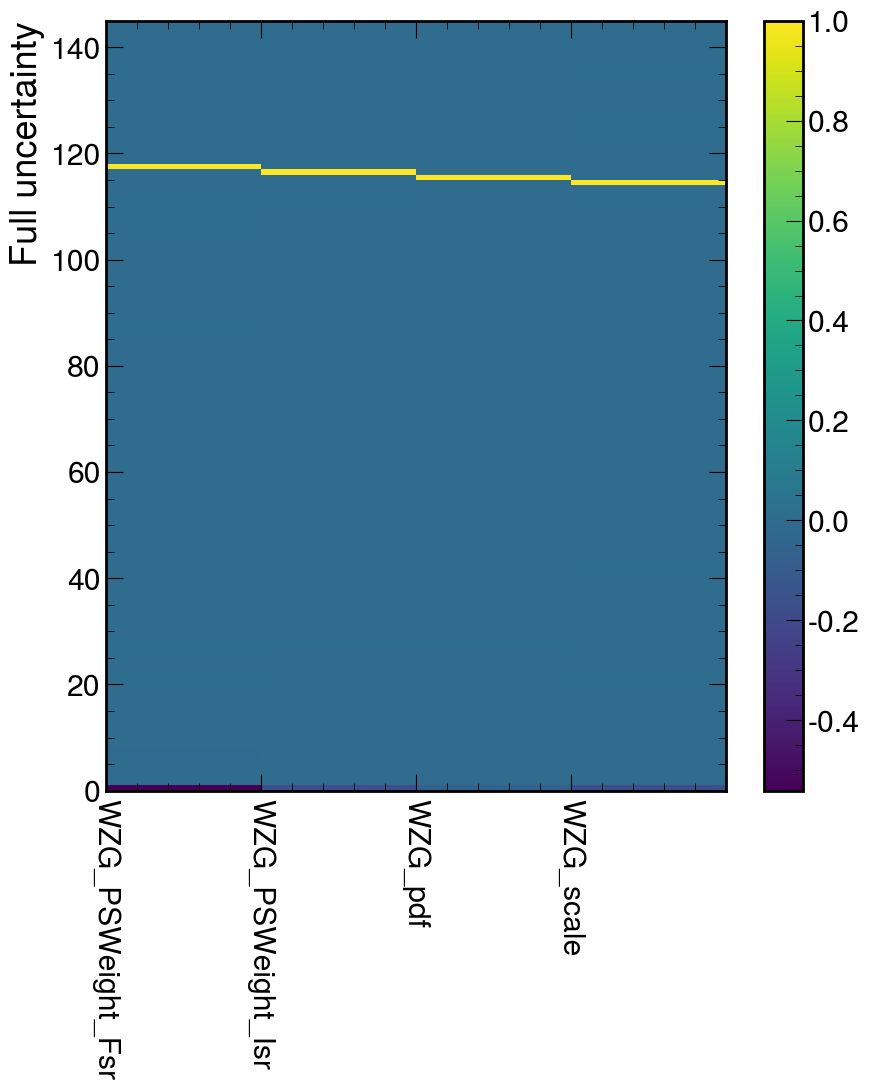

In [6]:
import mplhep as hep
plt.style.use(hep.style.CMS)
def plothist2d(h):
    fig,ax = plt.subplots(figsize=(10, 10))
    ax.set_ylabel('Full uncertainty')
    ax.set_xticklabels(['WZG_PSWeight_Fsr', 'WZG_PSWeight_Isr', 'WZG_pdf', 'WZG_scale'])
    plt.pcolormesh(*h.axes.edges.T, h.values().T)
    plt.colorbar()
    plt.xticks(rotation=270)
    plt.show()
plothist2d(bh_hist[27:31,0:])

#### 5. Visualize full uncertainties

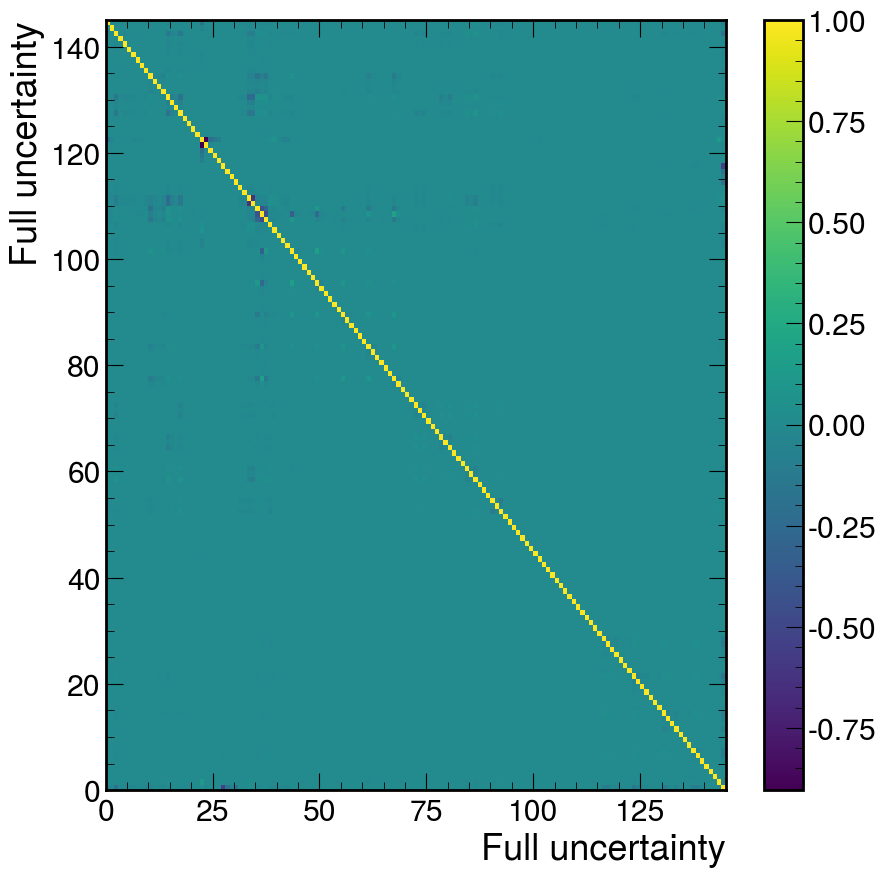

In [7]:
plt.close()
plt.style.use(hep.style.CMS)
def plothist2d(h):
    fig,ax = plt.subplots(figsize=(10, 10))
    ax.set_ylabel('Full uncertainty')
    ax.set_xlabel('Full uncertainty')
    plt.pcolormesh(*h.axes.edges.T, h.values().T)
    plt.colorbar()
    plt.show()
plothist2d(bh_hist)

#### 6. Conclusion  
 - No big correaltion is measured between WZG theory uncertainties and other sources